# imports 

In [53]:
# data transforms 
import pandas as pd 
import numpy as np

# data viz 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.figure_factory as ff

# ml preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

# ml modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# statistics 
from scipy import stats

In [3]:
tiktok_df = pd.read_csv('tiktok_dataset.csv')
tiktok_df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


# eda

## basic stats

In [4]:
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
tiktok_df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [6]:
tiktok_df.shape

(19382, 12)

## drop missing vals

In [7]:
tiktok_df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
tiktok_df.dropna(axis=0, inplace=True)
tiktok_df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

# value counts, proportion, mean

In [9]:
tiktok_df['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [10]:
# the proportion of verified and unverified users 
tiktok_df['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [11]:
# the mean views for verified and unverified tiktoks 
tiktok_df.groupby('verified_status')['video_view_count'].mean() 

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

## outliers

### `video_comment_count`

In [12]:
# Create the box plot
fig = px.box(tiktok_df, 
             x='video_comment_count', 
             title='Boxplot to detect outliers for video_comment_count')

# Show the plot
fig.show()

In [13]:
q25 = tiktok_df['video_comment_count'].quantile(.25)
q75 = tiktok_df['video_comment_count'].quantile(.75)

iqr = q75 - q25 

upper_limit = q75 + 1.5 * iqr

tiktok_df.loc[tiktok_df['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit

q25, q75, iqr, upper_limit 

(np.float64(1.0), np.float64(292.0), np.float64(291.0), np.float64(728.5))

In [14]:
# Create the box plot
fig = px.box(tiktok_df, 
             x='video_comment_count', 
             title='Boxplot to detect outliers for video_comment_count')

# Show the plot
fig.show()

### `video_like_count`

In [15]:
# Create the box plot
fig = px.box(tiktok_df, 
             x='video_like_count', 
             title='Boxplot to detect outliers for video_like_count')

# Show the plot
fig.show()

In [16]:
q25 = tiktok_df['video_like_count'].quantile(.25)
q75 = tiktok_df['video_like_count'].quantile(.75)

iqr = q75 - q25 

upper_limit = q75 + 1.5 * iqr 

tiktok_df.loc[tiktok_df['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

q25, q75, iqr, upper_limit

(np.float64(810.75),
 np.float64(125020.0),
 np.float64(124209.25),
 np.float64(311333.875))

In [17]:
# Create the box plot after reassigning 
fig = px.box(tiktok_df, 
             x='video_like_count', 
             title='Boxplot to detect outliers for video_like_count')

# Show the plot
fig.show()

## resampling 

In [18]:
tiktok_df['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [19]:
majority = tiktok_df[tiktok_df['verified_status'] == 'not verified']
majority.shape 

(17884, 12)

In [20]:

minority = tiktok_df[tiktok_df['verified_status'] == 'verified']
minority.shape 

(1200, 12)

In [21]:

upsample = resample(minority, replace=True, n_samples=len(majority), random_state=42)

upsampled_df = pd.concat([majority, upsample]).reset_index(drop=True)

upsampled_df['verified_status'].value_counts() 

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

## correlation 

In [22]:
upsampled_df.corr(numeric_only=True) 

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
#,1.000000,-0.001369,-0.011800,-0.698969,-0.626105,-0.503634,-0.489758,-0.610763
video_id,-0.001369,1.000000,0.013938,0.001607,0.004534,0.009136,0.006814,0.010564
video_duration_sec,-0.011800,0.013938,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000080
video_view_count,-0.698969,0.001607,0.013892,1.000000,0.855343,0.710466,0.691557,0.747564
video_like_count,-0.626105,0.004534,0.004028,0.855343,1.000000,0.832361,0.806369,0.816416
video_share_count,-0.503634,0.009136,0.001944,0.710466,0.832361,1.000000,0.709738,0.671601
video_download_count,-0.489758,0.006814,0.006930,0.691557,0.806369,0.709738,1.000000,0.794524
video_comment_count,-0.610763,0.010564,-0.000080,0.747564,0.816416,0.671601,0.794524,1.000000


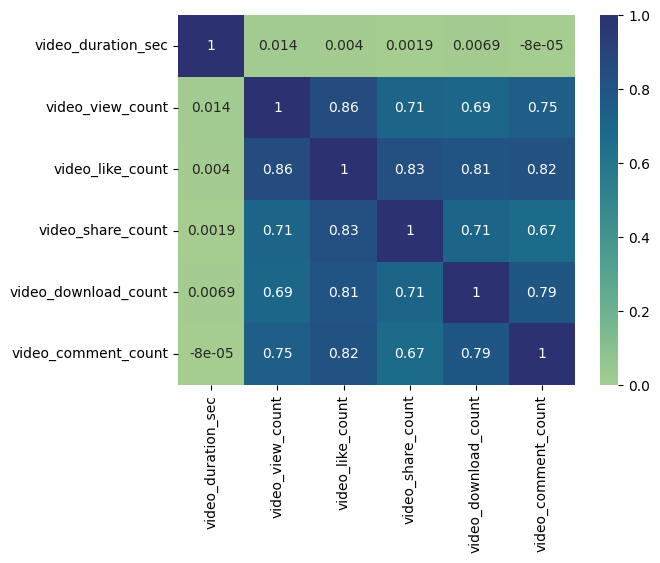

In [23]:
sns.heatmap(
    upsampled_df[[
        "video_duration_sec",
        #"claim_status", 
        #"author_ban_status", 
        "video_view_count",
        "video_like_count", 
        "video_share_count", 
        "video_download_count", 
        "video_comment_count"]].corr(),
    annot=True, 
    cmap='crest'
)

plt.show() 

# Hypothesis testing:

## `verified_status`

Hypotheses: 
1. null hypothesis = there is NOT a statistically significant different video_view_count between the 2 groups of verified users
2. alt hypothesis  = there is a statistically significant different video_view_count between the 2 groups of verified users 

In [24]:
not_verified = tiktok_df[tiktok_df['verified_status'] == 'not verified']['video_view_count']
verified = tiktok_df[tiktok_df['verified_status'] == 'verified']['video_view_count']

In [25]:
stats.ttest_ind(a=verified, b=not_verified, equal_var=False)

TtestResult(statistic=np.float64(-25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

We reject the null hypothesis. This could mean that there might be a fundamental difference in behavior between verified and non-verified users.   

# Construct model 

## select features

In [26]:
y = upsampled_df['verified_status']

In [27]:
X = upsampled_df[[
    "video_duration_sec", 
    "claim_status",
    "author_ban_status", 
    "video_view_count", 
    "video_share_count", 
    "video_download_count", 
    "video_comment_count"
]]

## train-test split 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

## encode features

### X encode 

In [29]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [30]:
X_train['author_ban_status'].unique() 

array(['under review', 'active', 'banned'], dtype=object)

In [31]:
X_train['claim_status'].unique() 

array(['opinion', 'claim'], dtype=object)

In [32]:
# select categorical columns, create OneHotEncoder instance, fit transform to categoricals 
X_train_to_encode = X_train[['author_ban_status', 'claim_status']]
X_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded_features = X_encoder.fit_transform(X_train_to_encode)

In [33]:
# make the encoded categoricals a dataframe 
encoded_df = pd.DataFrame(X_train_encoded_features, columns=X_encoder.get_feature_names_out())
encoded_df.head() 

,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,0.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,1.0


In [34]:
# join the encoded categoricals back to original X_train
X_train_final = pd.concat([
    X_train.drop(columns=['author_ban_status', 'claim_status']).reset_index(drop=True),
    encoded_df],
    axis=1 
)

X_train_final.head() 

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,24,4320.0,194.0,23.0,0.0,0.0,1.0,1.0
1,8,7899.0,143.0,6.0,1.0,0.0,0.0,1.0
2,53,8796.0,863.0,2.0,0.0,0.0,0.0,1.0
3,43,176311.0,22270.0,1546.0,557.0,0.0,0.0,0.0
4,27,519.0,65.0,1.0,0.0,0.0,0.0,1.0


### y encode

In [39]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False) 
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel() 

y_train_final 

array([1., 1., 1., ..., 0., 0., 0.], shape=(26826,))

## build model 

In [40]:
log_clr = LogisticRegression(random_state=42, max_iter=800).fit(X_train_final, y_train_final)

# Execute

## encode test sets

In [42]:
X_test_to_encode = X_test[['author_ban_status', 'claim_status']]
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test_encoded_df

,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
8937,0.0,0.0,1.0
8938,0.0,0.0,0.0
8939,0.0,0.0,1.0
8940,0.0,0.0,1.0


In [46]:
X_test_final = pd.concat([
    X_test.drop(columns=['author_ban_status', 'claim_status']).reset_index(drop=True), 
    X_test_encoded_df 
], axis=1)

X_test_final

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,14,1580.0,49.0,12.0,1.0,0.0,0.0,1.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,1.0,0.0
2,52,449.0,20.0,0.0,0.0,0.0,1.0,1.0
3,17,4458.0,111.0,6.0,2.0,1.0,0.0,1.0
4,8,9877.0,65.0,5.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8937,11,4580.0,153.0,4.0,1.0,0.0,0.0,1.0
8938,59,706331.0,98625.0,413.0,128.0,0.0,0.0,0.0
8939,52,7820.0,142.0,17.0,5.0,0.0,0.0,1.0
8940,49,5179.0,426.0,21.0,0.0,0.0,0.0,1.0


In [45]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel() 
y_test_final

array([1., 0., 1., ..., 1., 0., 1.], shape=(8942,))

In [49]:
X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape

((26826, 8), (8942, 8), (26826,), (8942,))

## predict

In [47]:
y_pred = log_clr.predict(X_test_final)
y_pred

array([1., 0., 1., ..., 1., 1., 1.], shape=(8942,))

## Visualize results

In [55]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_final, y_pred, labels=log_clr.classes_)

# Convert the labels to lists
x_labels = list(log_clr.classes_)  # Predicted classes
y_labels = list(log_clr.classes_)  # True classes

# Convert confusion matrix to a Plotly heatmap
fig = ff.create_annotated_heatmap(
    z=cm,
    x=x_labels,  # Labels for x-axis
    y=y_labels,  # Labels for y-axis
    colorscale='Blues',  # Color scheme
    showscale=True       # Show color bar
)

# Update layout for better aesthetics
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted Label",
    yaxis_title="True Label"
)

# Display the plot
fig.show()

In [56]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.76      0.53      0.63      4437
not verified       0.65      0.84      0.73      4505

    accuracy                           0.69      8942
   macro avg       0.70      0.68      0.68      8942
weighted avg       0.70      0.69      0.68      8942



## Interpret model coefficients

In [59]:
pd.DataFrame({
    "Feature names": log_clr.feature_names_in_, "Model Coefficient": log_clr.coef_[0]
}).sort_values(by='Model Coefficient', ascending=False)

,Feature names,Model Coefficient
7,claim_status_opinion,1.682389e+00
4,video_comment_count,5.235895e-04
2,video_share_count,5.098059e-06
1,video_view_count,-1.807609e-07
3,video_download_count,-1.080284e-04
0,video_duration_sec,-8.610889e-04
6,author_ban_status_under review,-1.259541e-01
5,author_ban_status_banned,-3.795293e-01


- Each additional second has a roughly 1% log odd increase in the user being verified.
- So longer videos tend to have an association with a user being verified.  